# Math 725 Advanced Linear Algebra
## Space filling Curves


### Brent A. Thorne

brentathorne@gmail.com

##### Coordinate functional space explorations

#### Resources:
Brain Hayes' wonderful article from American Scientist that got me thinking about this years ago...

https://www.americanscientist.org/article/crinkly-curves 

https://en.wikipedia.org/wiki/Transformation_matrix

https://www.brainvoyager.com/bv/doc/UsersGuide/CoordsAndTransforms/SpatialTransformationMatrices.html

https://en.wikipedia.org/wiki/Hilbert_curve

https://en.wikipedia.org/wiki/Gosper_curve

In [1]:
# import libraries
import numpy as np
import sympy as sym
from sympy.matrices import Matrix
from sympy import I
import matplotlib.pyplot as plt
from IPython.display import display, Math, Latex
from sympy import init_printing
init_printing()

## Hilbert Curve
Open with a semimanual process then generalize

In [65]:
def m_plot(P):
    p=np.array(P.tolist())
    x=p[0]
    y=p[1]
    plt.plot(x,y)
    plt.scatter(x,y)
    plt.scatter(x[0],y[0],c='pink')
    plt.grid(visible=True);
    plt.gca().set_aspect("equal") # square grids are pretty
    plt.axhline(0, color='black', alpha = .2, linestyle='--')
    plt.axvline(0, color='black', alpha = .2, linestyle='--')

## Affine Hilbert

⎡-1/2  -1/2  1/2  1/2 ⎤
⎢                     ⎥
⎢-1/2  1/2   1/2  -1/2⎥
⎢                     ⎥
⎢ 0     0     0    0  ⎥
⎢                     ⎥
⎣ 1     1     1    1  ⎦

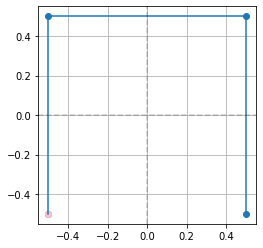

In [3]:
# let's begin again this time with a 3D affine transformation so we don't have to do this thrice 
T = Matrix([
    [1,0,0,0],
    [0,1,0,0],
    [0,0,1,0],
    [0,0,0,1]
])

# Now our 2D shape, we'll save that 3rd dim for later
P = sym.Rational(1,2)*Matrix([[-1,-1],[-1,1],[1,1],[1,-1]]).T #make normal unit square
P = P.col_join(sym.zeros(1,P.shape[1]))
P = P.col_join(sym.ones(1,P.shape[1]))
m_plot(T*P)
T*P

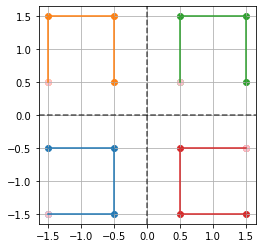

In [4]:
R = Matrix([
    [0,1,0,0],
    [1,0,0,0],
    [0,0,1,0],
    [0,0,0,1]
]) # actaully this is a reflect and rotate


S_1 = Matrix([
    [1,0,0,-1],
    [0,1,0,-1],
    [0,0,1,0],
    [0,0,0,1]
])
m_plot(S_1*R*P) #reflect/rotate and shift left and down

S_2 = Matrix([
    [1,0,0,-1],
    [0,1,0,1],
    [0,0,1,0],
    [0,0,0,1]
])

m_plot(S_2*P) # shift left and up

S_3 = Matrix([
    [1,0,0,1],
    [0,1,0,1],
    [0,0,1,0],
    [0,0,0,1]
])

m_plot(S_3*P) # shift right and up

S_4 = Matrix([
    [1,0,0,1],
    [0,1,0,-1],
    [0,0,1,0],
    [0,0,0,1]
])

R_0 = Matrix([
    [0,-1,0,0],
    [-1,0,0,0],
    [0,0,1,0],
    [0,0,0,1]
]) # infinite monkeys

m_plot(S_4*R_0*P)

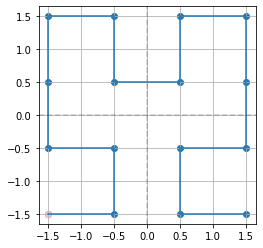

In [5]:
# my monkey
s=sym.Rational(1,2)
x = P

X = S_1*R*x
X = X.row_join(S_2*x)
X = X.row_join(S_3*x)
X = X.row_join(S_4*R_0*x)

m_plot(X)

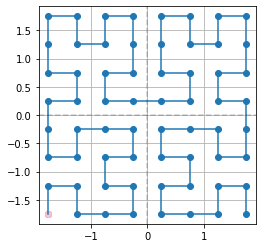

In [6]:
# release the monkeys
N = s*Matrix([
    [1,0,0,0],
    [0,1,0,0],
    [0,0,1,0],
    [0,0,0,1/s]
]) # normalize back to unit square 
P1=N*X

x = P1
X = S_1*R*x
X = X.row_join(S_2*x)
X = X.row_join(S_3*x)
X = X.row_join(S_4*R_0*x)

m_plot(X) 

## Gosper Curve

In [7]:
def z_plot(Z, c=None):
    #display(Latex(f'${sym.latex(Z.T)}$'))
    z= np.array(Z.tolist()).astype(np.complex64)
    n = len(z)
    plt.scatter(z.real, z.imag, c=c)
    for i in range(len(z)): # this got a bit fancy
        zz = z[i] + .06 *np.exp(1j*2*np.pi*i/n)  #offset text
        plt.text(zz.real, zz.imag, i, fontsize=12)
#    z = np.append(z,z[0]) # close the shape
    plt.plot(z.real, z.imag, c=c)
    plt.grid(visible=True);
    plt.gca().set_aspect("equal") # square grids are pretty
    plt.axhline(0, color='black', alpha = .2, linestyle='--')
    plt.axvline(0, color='black', alpha = .2, linestyle='--')

In [8]:
##  Build our basis
# 360/60, 2*sym.pi/6, 2*sym.pi- 2*sym.pi/6

# translate
# rotate -2π/3 and translate
# rotate -5π/3 and translate
# rotate -π/3 and translate
# translate
# rotate 2π/3 and translate

z = 2*sym.pi*sym.I/6
p0 = 0
p1 = p0+sym.exp(sym.pi*sym.I/2)
p2 = p1+sym.exp(z/2)
p3 = p2+sym.exp(-sym.pi*sym.I/2)
p4 = p3+sym.exp(-z/2)
p5 = p4+sym.exp(sym.pi*sym.I/2)
p6 = p5+sym.exp(sym.pi*sym.I/2)
p7 = p6+sym.exp(5*z/2)
# now fix up the Hilbert curve for complex affine transforms

In [9]:
p = [p0, p1, p2, p3, p4, p5, p6, p7]
p

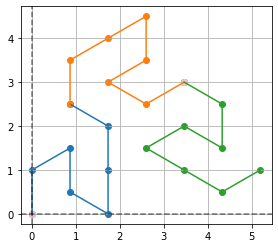

In [121]:
G0=Matrix([[sym.re(pp), sym.im(pp)]for pp in p]).T  # map to R^2
G0 = G0.col_join(sym.zeros(1,G0.shape[1])) # Pad to R^3
G0 = G0.col_join(sym.ones(1,G0.shape[1])) # Make similar in R^4 (R^3 X R^1) 

ROT = lambda theta: Matrix([
    [sym.cos(theta),-sym.sin(theta),0,0],
    [sym.sin(theta), sym.cos(theta),0,0],
    [0,0,1,0],
    [0,0,0,1]
])

TOT = lambda G: Matrix([  
    [1,0,0,G.col(-1)[0]],
    [0,1,0,G.col(-1)[1]],
    [0,0,1,0],
    [0,0,0,1]
])  # translates by last point in matrix/seq

OTO = lambda G: Matrix([  
    [1,0,0,G.col(0)[0]],
    [0,1,0,G.col(0)[1]],
    [0,0,1,0],
    [0,0,0,1]
])  # translates by first point in matrix/seq

m_plot(G0)
#m_plot(T_0*G0)
G1=TOT(G0)*ROT(2*2*sym.pi/6)*TOT(-G0)*G0
m_plot(G1) 
G2=OTO(G1)*ROT(-2*2*sym.pi/6)*G0
m_plot(G2)
# ... repeat n times as we did in the basis generator

In [100]:
G0, G0.col(-1)[:2]

⎛⎡      √3   √3               √3 ⎤           ⎞
⎜⎢0  0  ──   ──   √3  √3  √3  ── ⎥           ⎟
⎜⎢      2    2                2  ⎥           ⎟
⎜⎢                               ⎥  ⎡√3     ⎤⎟
⎜⎢0  1  3/2  1/2  0   1   2   5/2⎥, ⎢──, 5/2⎥⎟
⎜⎢                               ⎥  ⎣2      ⎦⎟
⎜⎢0  0   0    0   0   0   0    0 ⎥           ⎟
⎜⎢                               ⎥           ⎟
⎝⎣1  1   1    1   1   1   1    1 ⎦           ⎠

##### Things to consider:
 * Permutation of basis for next interation
 * Geneneralized generator for all possible space filling curves

## $\mathbb{C}$affine
$\mathcal{T}$ea and $\mathbb{C}$offee

Does this even make since for non-real valued transfromation? ... I think not, however for $\mathbb{C}^1$ this is super simple as we'll demonstrate below.

##### Things to consider:
 * Modify to for $\Bbb{C}$
 * What would a $\Bbb{C}\times\Bbb{R}^1\mapsto\Bbb{R}^2\times\Bbb{R}^1$ affine transform look like? The dim seems to check out.

## Complex Hilbert
The point here is to only use matrix transformation to generate our curves but now our transformations are additions and scalar multiplications of eigenvalues. 

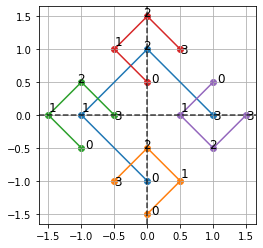

In [161]:
n = 4
ei = sym.ones(4,1)
z = sym.exp(-2*sym.pi*sym.I/n)
h = Matrix([z**(i+1) for i in range(4)])
z_plot(h)

z_plot(1/2 * z**2 * h.conjugate() - sym.I*ei)
z_plot(1/2 * h - ei) 
z_plot(1/2 * h + sym.I*ei)
z_plot(1/2 * z**4 * h.conjugate() + ei)

# now we can see a way forward
# a rather simple transform of the coordinates
# using Antihermitian but we'll leave that as an exercise for later 

 ### Sort out the transforms

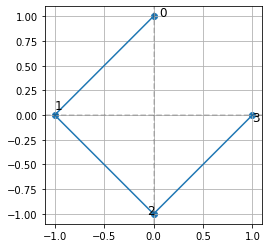

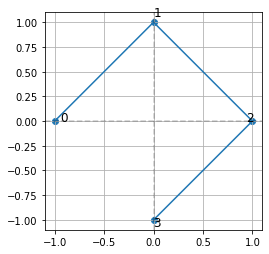

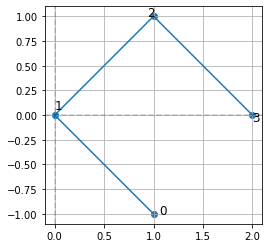

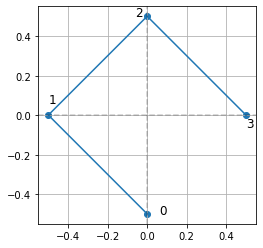

In [140]:
# mirror x
z_plot(h.conjugate())
plt.show()

# rot
z_plot(h*z)
plt.show()

# shift
z_plot(h+sym.ones(4,1))
plt.show()

# shift
z_plot(.5*h)
plt.show()